In [1]:
import cv2
from darkflow.net.build import TFNet
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

/home/cesare/anaconda3/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
# define the model options and run

options = {
    'model': 'cfg/yolo.cfg',
    'load': 'bin/yolo.weights',
    'threshold': 0.3,
    'gpu': 0.0
}

tfnet = TFNet(options)

Parsing ./cfg/yolo.cfg
Parsing cfg/yolo.cfg
Loading bin/yolo.weights ...
Successfully identified 203934260 bytes
Finished in 0.06974411010742188s
Model has a coco model name, loading coco labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 608, 608, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 608, 608, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 304, 304, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 304, 304, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 152, 152, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 152, 152, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 76, 76, 128)
 Load  |  Yep!

In [3]:
# read the color image and covert to RGB

img = cv2.imread('eagle.jpg', cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# use YOLO to predict the image
result = tfnet.return_predict(img)

img.shape

(512, 773, 3)

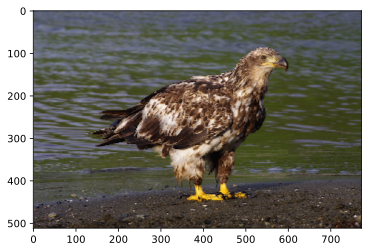

In [5]:
plt.imshow(img)
plt.show()

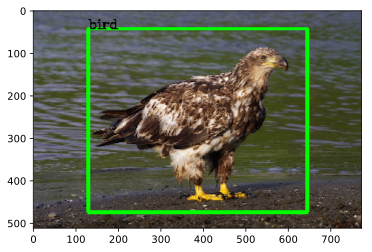

In [6]:
# pull out some info from the results

tl = (result[0]['topleft']['x'], result[0]['topleft']['y'])
br = (result[0]['bottomright']['x'], result[0]['bottomright']['y'])
label = result[0]['label']


# add the box and label and display it
img = cv2.rectangle(img, tl, br, (0, 255, 0), 7)
img = cv2.putText(img, label, tl, cv2.FONT_HERSHEY_COMPLEX, 1, (0, 0, 0), 2)
plt.imshow(img)
plt.show()